# Install Dependencies

In [1]:
# Initial imports
import numpy as np
import pandas as pd
from path import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import tensorflow as tf

# Reproducibility
tf.random.set_seed(42)

# Ignore non-important Warnings
import logging 
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Import and Clean Data

In [2]:
# Read in data
data = Path("../Resources/mpg.csv")
df = pd.read_csv(data, na_values='?')

# Drop rows with missing values
df.dropna(inplace=True)

# Drop 'car name' column
df = df.drop(["car name"],1)

# Convert 'origin' to a string
df['origin'] = df['origin'].astype(str) 

# Encode Categorical Data

In [3]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[["origin"]]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(["origin"])

# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop("origin",1)

# Train Test Split

In [4]:
# Split our preprocessed data into our features and target arrays
y = df["mpg"].values
X = df.drop(["mpg"],1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Calculate the `mean` and `std` for each feature
X_train.describe().transpose()[['mean', 'std']]

,mean,std
cylinders,5.501730,1.697884
displacement,195.065744,103.898150
horsepower,104.795848,37.822913
weight,2975.494810,848.956590
acceleration,15.482007,2.689554
model year,76.000000,3.540441
origin_1,0.605536,0.489583
origin_2,0.190311,0.393228
origin_3,0.204152,0.403780


# Visualize Relationships

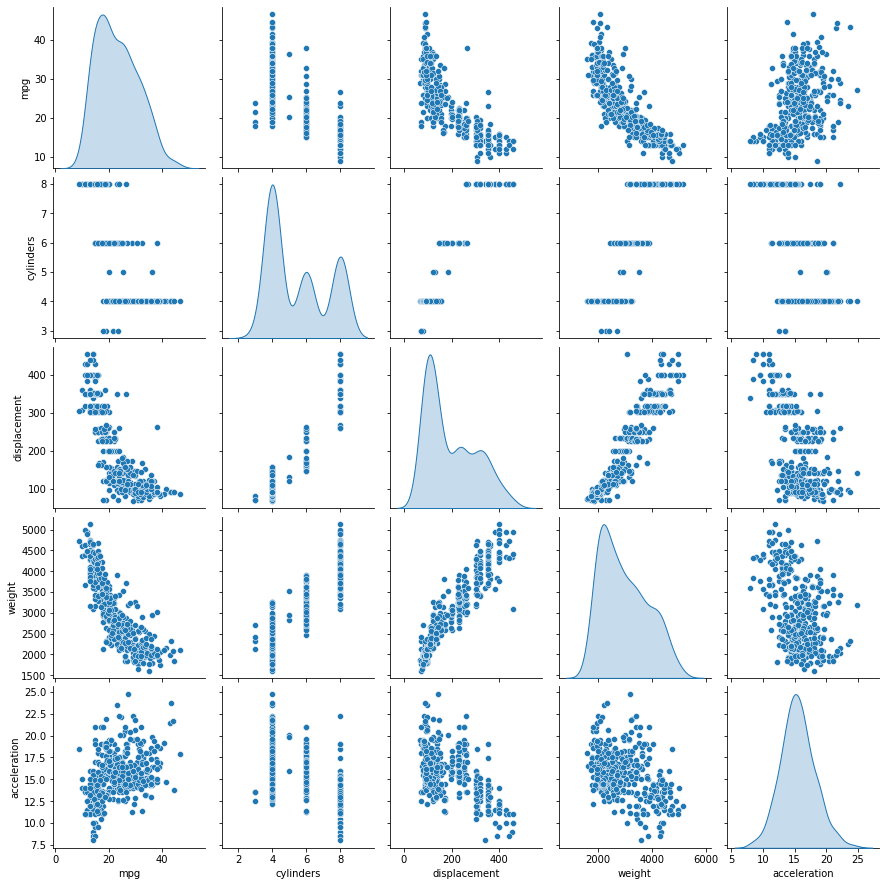

In [5]:
# Create a pairplot ot visualize the relationship between features
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']], diag_kind='kde')

# Standardize Data

In [6]:
# Initialize and fit the scaler object


In [7]:
# Scale train and test features


In [8]:
# Preview first test record


In [9]:
# Preview first test record scaled
